# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
# Importing data

out=pt.import_excel('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

In [3]:
# Importing errors (in publication, given as absolute errors for each oxide based on averaging of products within each experiment)

out_err=pt.import_excel_errors('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

# Example 1: Uncertainty in a single input parameter
- Here, we consider the effect of adding just 5% noise to measured Na2O contents of Cpx (a fairly typical uncertainty resulting from EPMA analyses)
- Because our liquids and cpx dataframes need to be the same size to feed into the calculate_Cpx_Liq functions, we also use the add_noise_sample_1phase to generate a dataframe of Liq compositions, however, we simply state noise_percent=0 so all the rows for each liquid are identical

In [6]:
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, 
                        noise_percent=0, duplicates=1000, err_dist="normal")


In [7]:
Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1, variable="Na2O", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

Cpx_5Na2O.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,P_kbar,T_K,Sample_ID_Cpx_Num
0,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.329460,0.0,0.252186,0.0,1.0,1293.15,0.0
1,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.306138,0.0,0.252186,0.0,1.0,1293.15,0.0
2,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.328867,0.0,0.252186,0.0,1.0,1293.15,0.0
3,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.316464,0.0,0.252186,0.0,1.0,1293.15,0.0
4,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.294512,0.0,0.252186,0.0,1.0,1293.15,0.0


## Now we input these two new dataframes into the function for calculating P and T iteratively using two equations
- here, T=equation 33 from Putirka 2008, P=Equation 31 from Putirka 2008

In [8]:
Out_5_noise_cpx=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


## Each histogram shows the pressure distribution from a single Cpx-Liquid pair resulting from adding 5% error.  

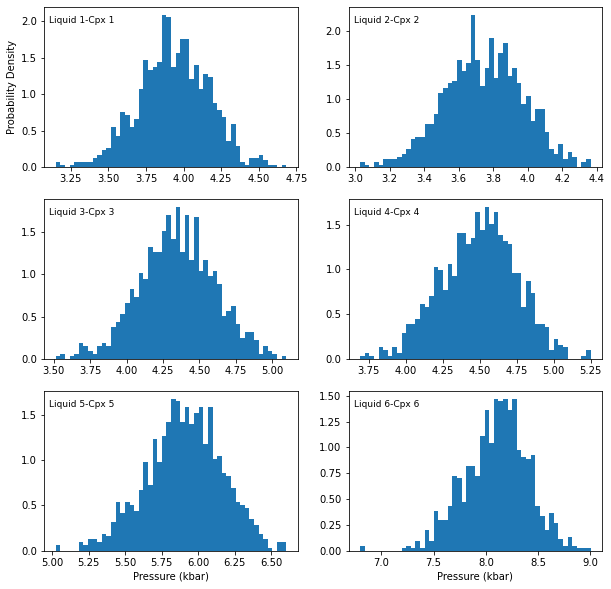

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

# Smaller plot used in the manuscript

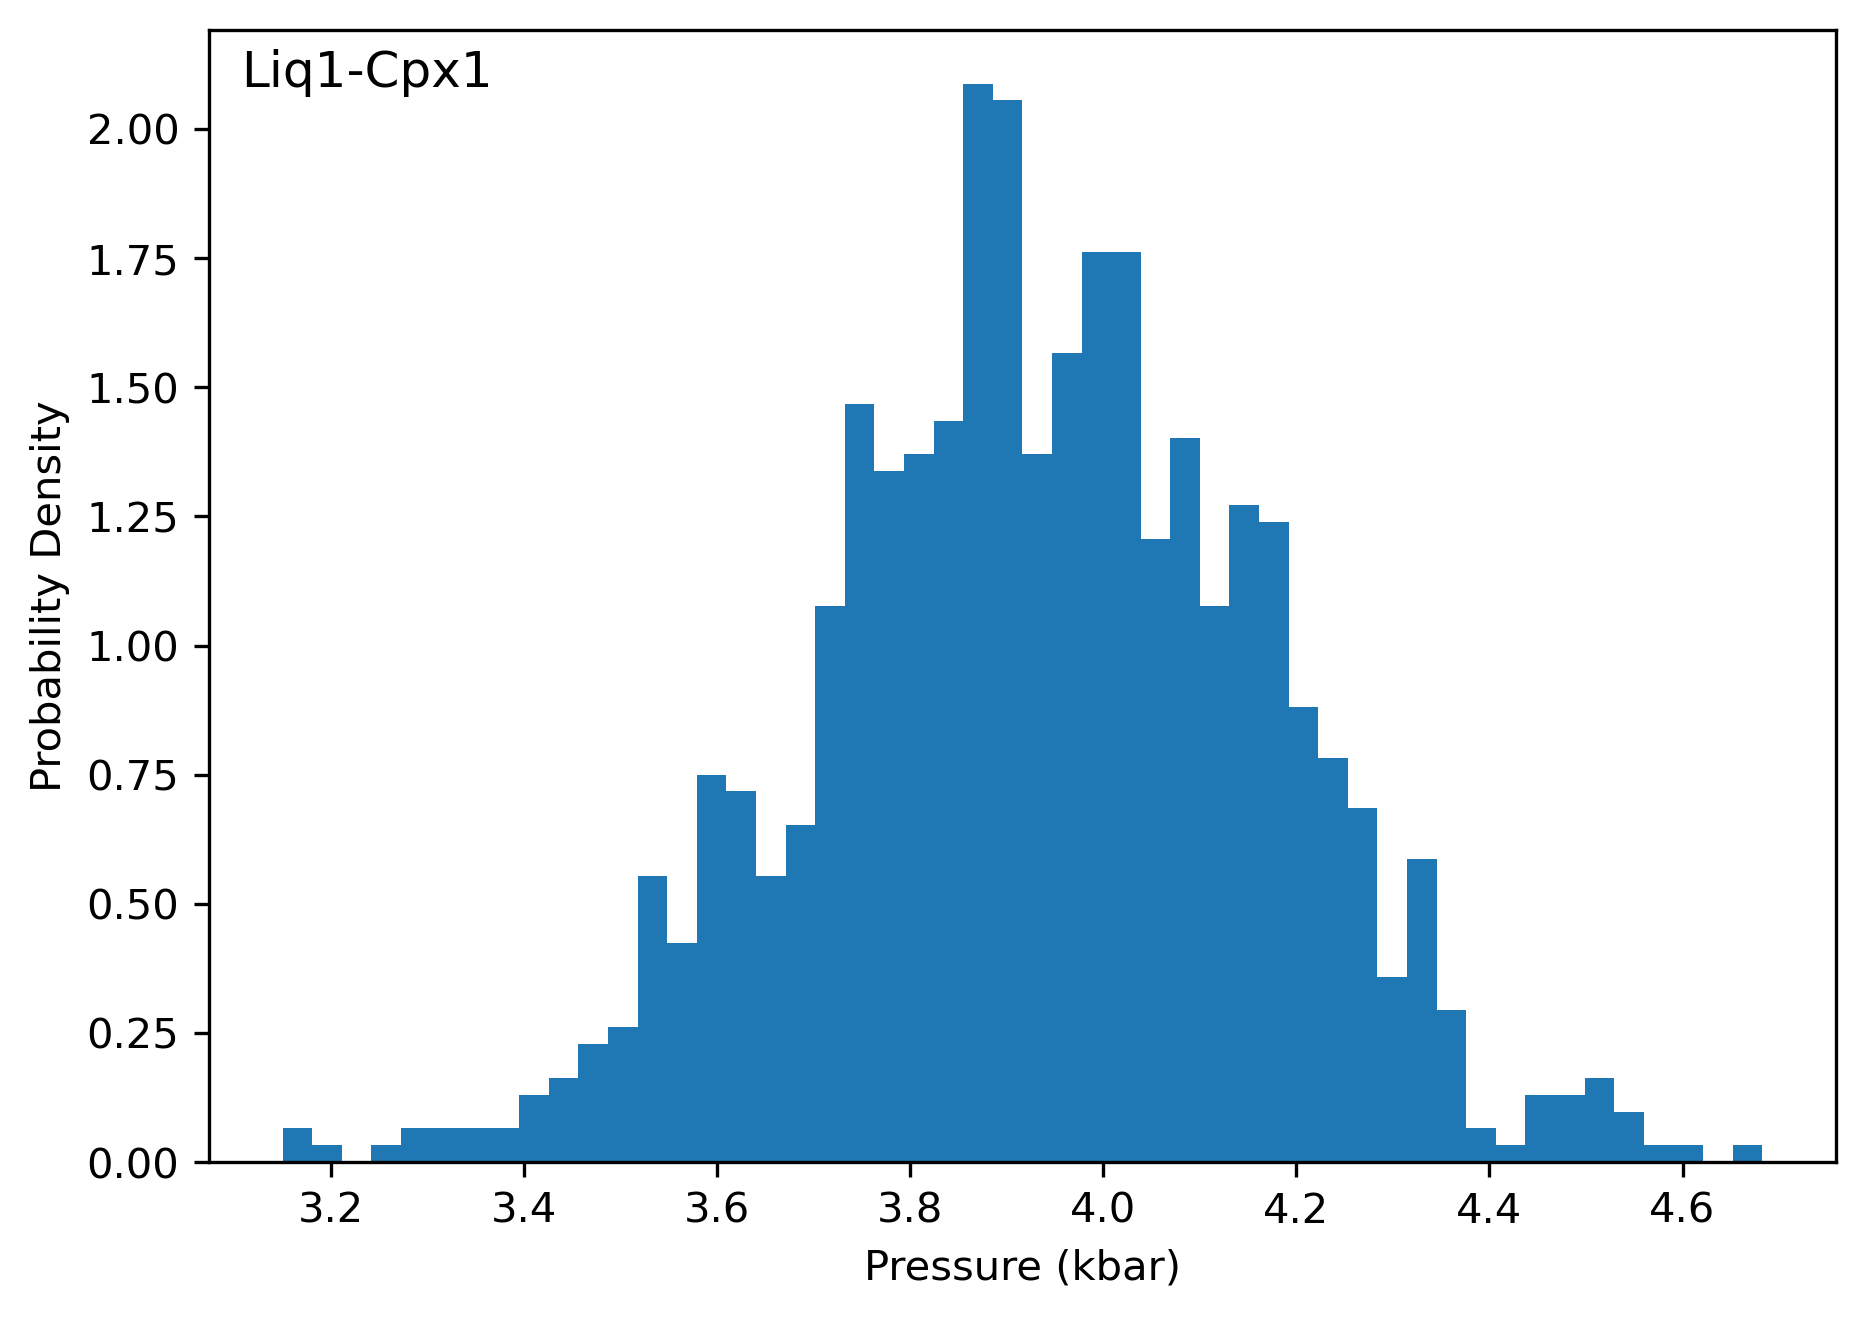

In [10]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(7, 5))
ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, 
                             "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liq1-Cpx1", xy=(0.02, 0.95), xycoords="axes fraction",
             fontsize=12)
ax1.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
fig.savefig('5%error_cpx.png', dpi=300)


## We can plot the same diagram but for temperatures

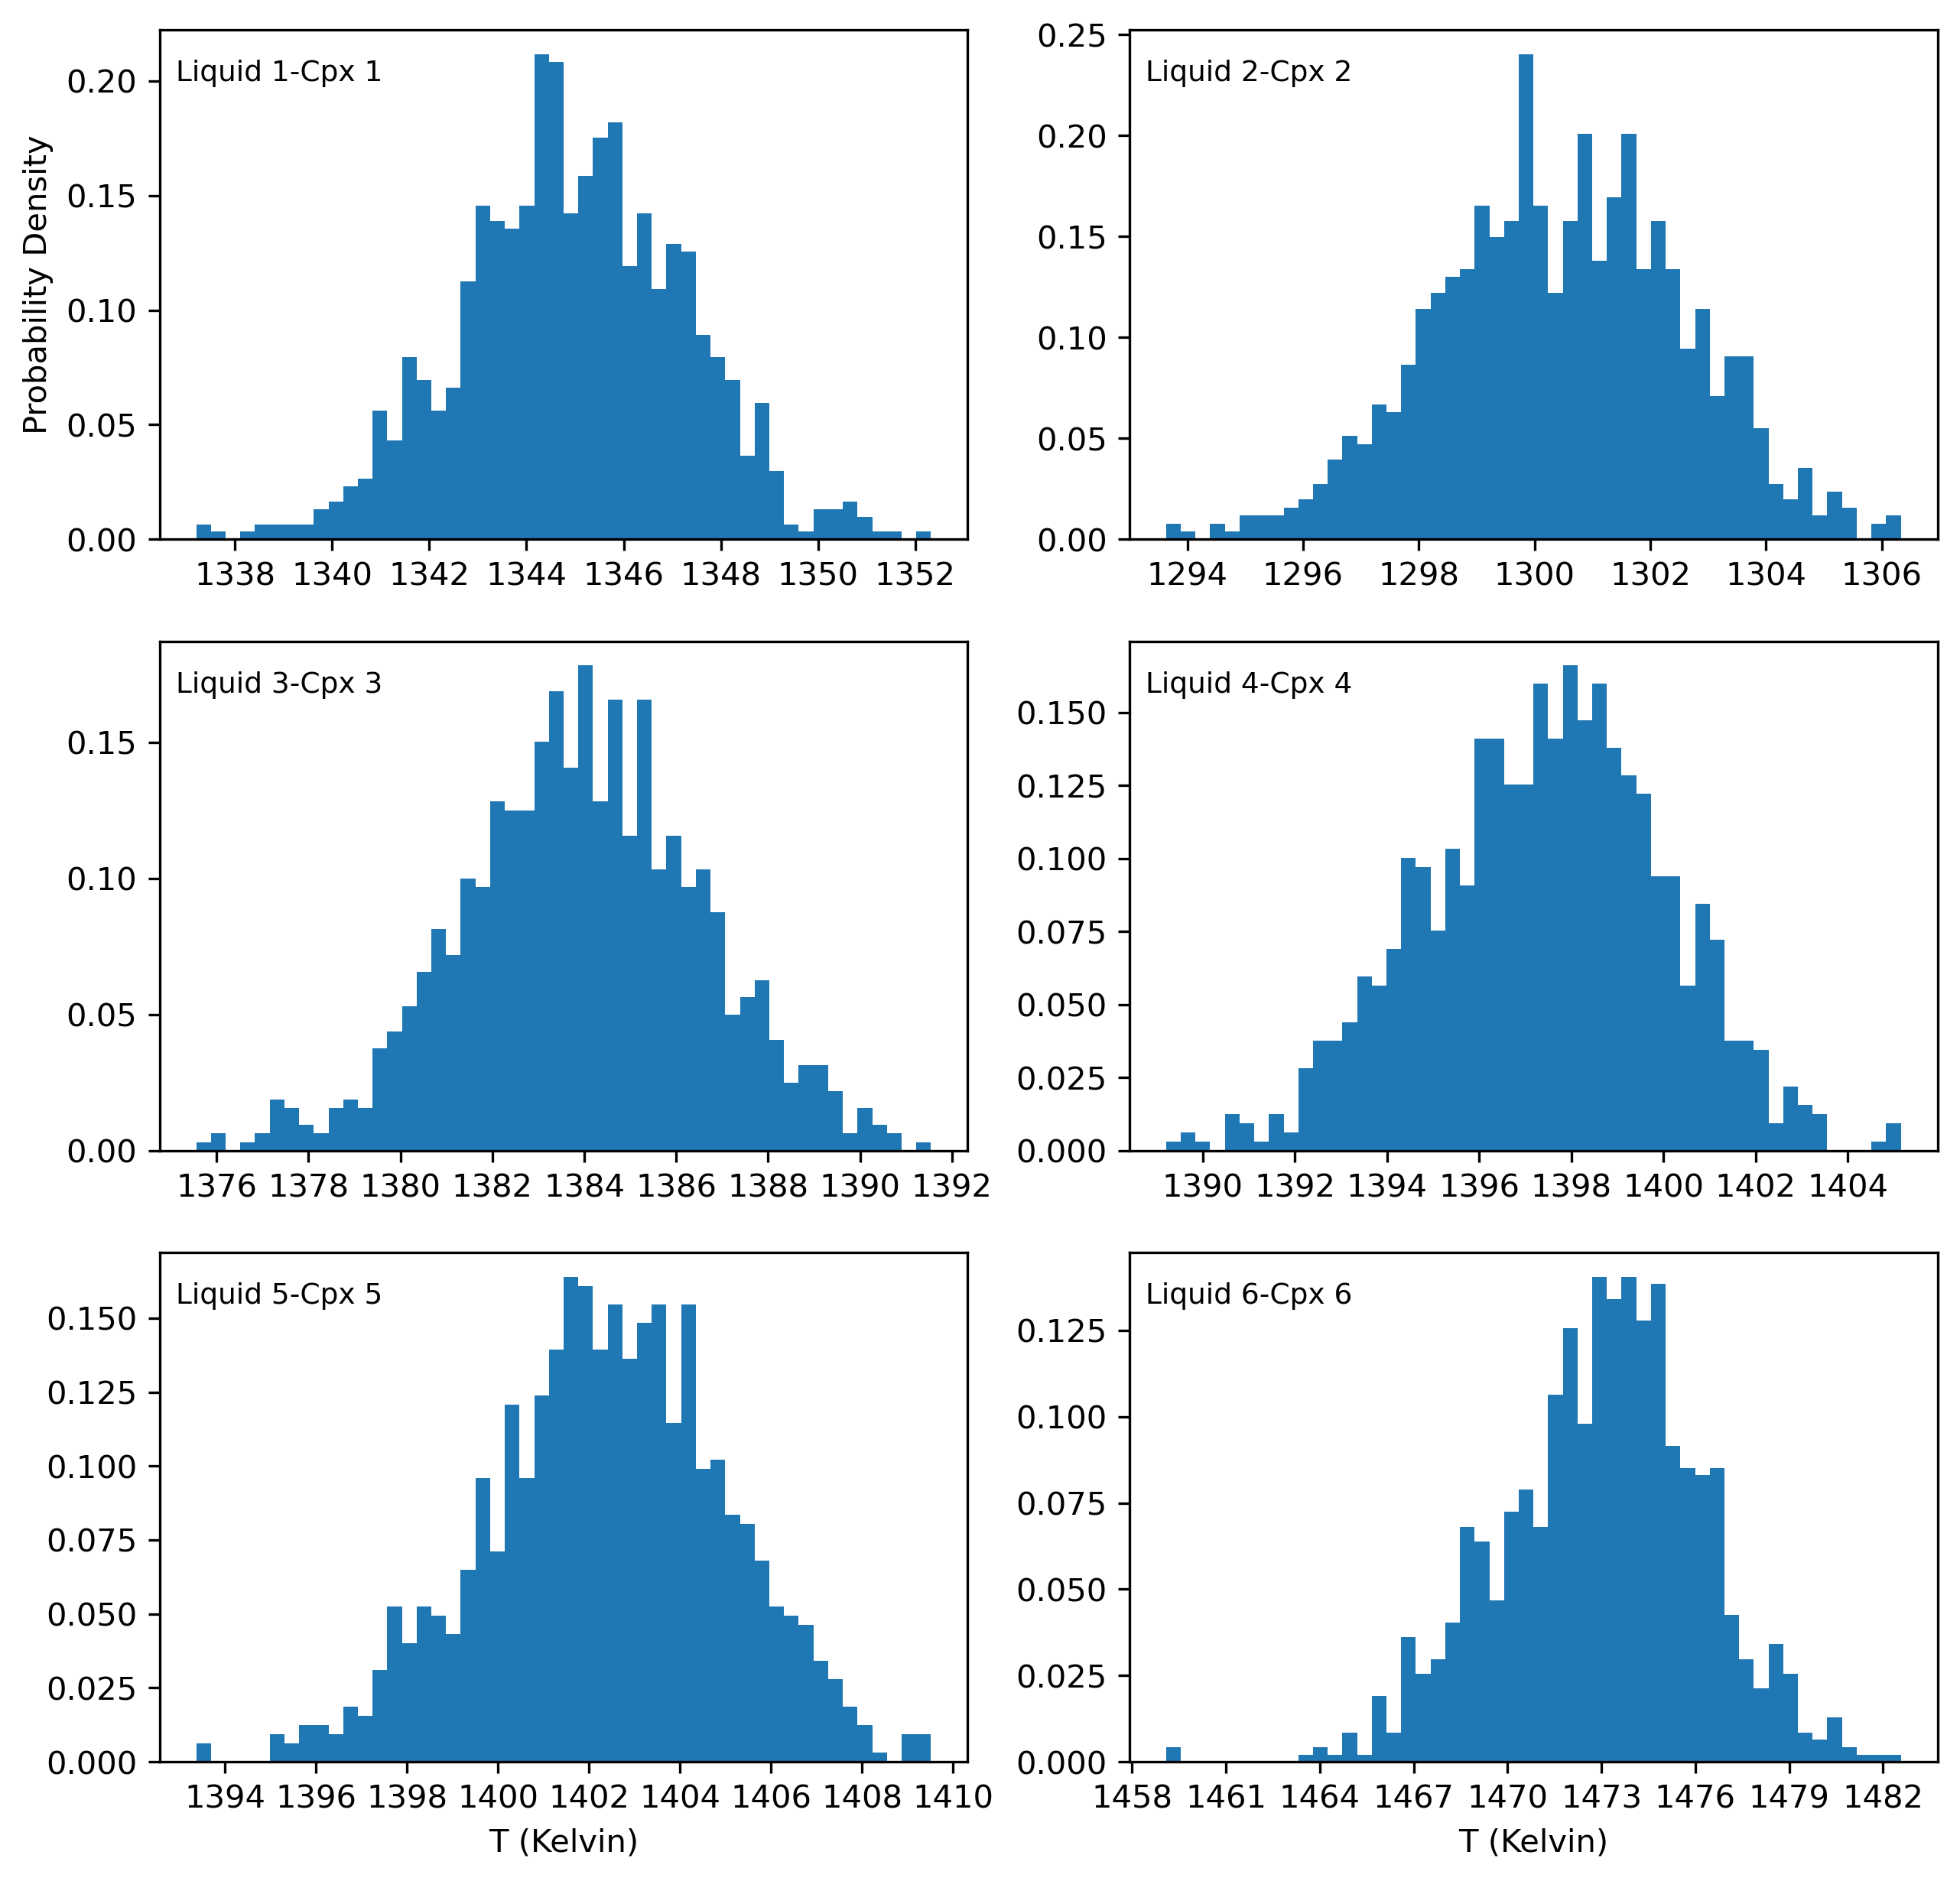

In [11]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax5.set_xlabel('T (Kelvin)')
ax6.set_xlabel('T (Kelvin)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 200
from pylab import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
ax3.xaxis.set_major_locator(MaxNLocator(integer = True))
ax4.xaxis.set_major_locator(MaxNLocator(integer = True))
ax5.xaxis.set_major_locator(MaxNLocator(integer = True))
ax6.xaxis.set_major_locator(MaxNLocator(integer = True))

### We can use the function Av_Noise_Samples to calculate the mean, median, max, min and standard deviation 

In [13]:
Stats_T_K=pt.av_noise_samples_series(Out_5_noise_cpx['T_K_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_T_K

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.942752,1344.901196,2.308278,1352.322119,1337.205734
1,1.0,1300.440038,1300.459298,2.150800,1306.328564,1293.633001
2,2.0,1383.967234,1383.968724,2.623782,1391.543662,1375.556070
3,3.0,1397.418680,1397.534325,2.607221,1405.150119,1389.202758
4,4.0,1402.372863,1402.428106,2.638398,1409.517922,1393.363390
5,5.0,1472.992644,1473.232385,3.204055,1482.568417,1459.088354
6,6.0,1480.811650,1480.917314,3.229233,1489.612151,1468.490051


In [14]:
Stats_P_kbar=pt.av_noise_samples_series(Out_5_noise_cpx['P_kbar_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_P_kbar

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.934374,3.930170,0.234007,4.682449,3.149882
1,1.0,3.745428,3.747425,0.226542,4.365907,3.028663
2,2.0,4.346137,4.346289,0.259851,5.096502,3.513026
3,3.0,4.495704,4.507018,0.254667,5.250792,3.692988
4,4.0,5.904258,5.909650,0.257799,6.602490,5.023919
5,5.0,8.102519,8.125008,0.301072,9.002757,6.796333
6,6.0,6.220740,6.230471,0.293966,7.021121,5.097516


# Example 2 - published absolute 1 sigma values for all oxides
- Here, we use the 1 sigma values for each oxide in both the glass and cpx reported by Feig et al. 2010
- We make a noisy dataframe of the same length for liquids and cpxs, then combine them into the function for iterating P and T

In [15]:
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [16]:
Out_st_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
                                    equationP="P_Put2008_eq31", 
                                             equationT="T_Put2008_eq33", eq_tests=True)


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
Stats_T_K=pt.av_noise_samples_series(Out_st_noise['T_K_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_T_K

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.316354,1344.496307,12.156055,1383.981199,1307.185561
1,1.0,1298.092256,1299.419450,15.867514,1334.790643,1139.742090
2,2.0,1380.715702,1383.326833,21.988852,1429.873235,1265.509272
3,3.0,1396.493565,1396.842389,10.366643,1427.566853,1359.765979
4,4.0,1402.021635,1402.308633,11.274378,1437.974486,1359.131180
5,5.0,1473.006542,1473.013056,6.586338,1492.073485,1452.240589
6,6.0,1480.130364,1480.206448,8.854420,1507.746133,1449.642903


In [18]:
Stats_P_kbar=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.855924,3.913617,0.864228,6.468659,-0.197234
1,1.0,3.517428,3.711572,1.390563,6.028544,-14.466735
2,2.0,4.068138,4.332351,2.047348,8.763365,-7.140502
3,3.0,4.427126,4.468275,0.875775,7.075554,0.693245
4,4.0,5.848026,5.877506,0.926226,8.636011,2.702493
5,5.0,8.107428,8.122527,0.463134,9.510665,6.340681
6,6.0,6.198036,6.208357,0.500913,8.267293,4.512914


## Example plot shown in manuscript for just 2 cpx-liq pairs from experiments

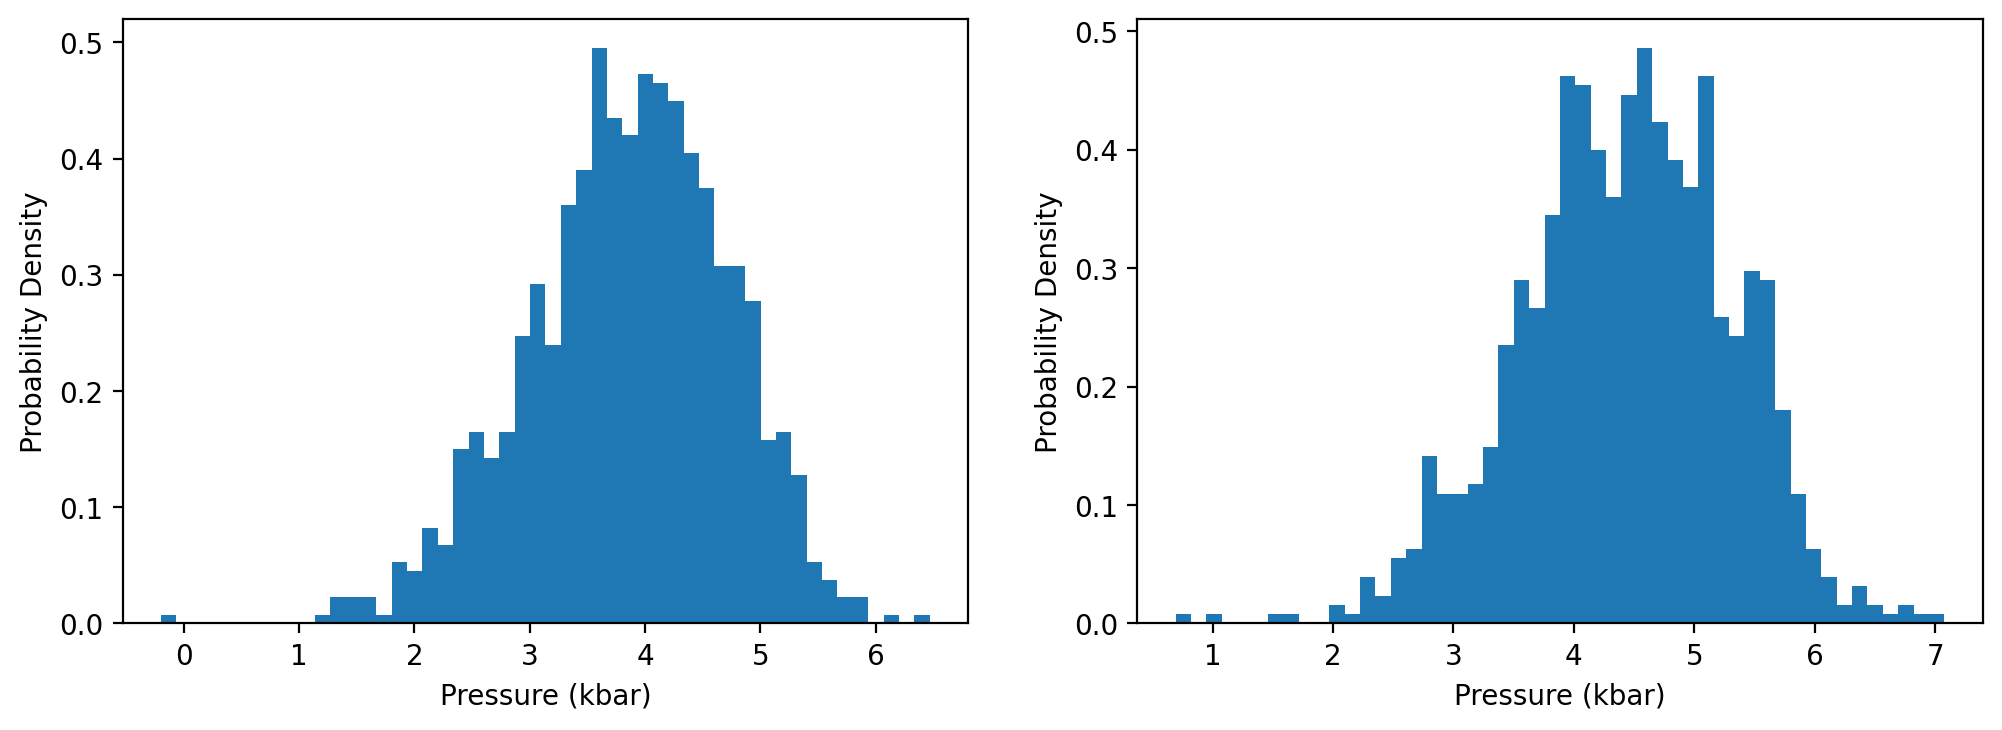

In [19]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==3, "P_kbar_calc"], bins=50, density = True)
#ax2.set_xlim([0, 6])
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax2.set_ylabel('Probability Density')
fig.savefig('Manuscript_2CpxNoises.png', dpi=300, transparent=True)

# Same plot but for 6 separate cpx-liq pairs
- can average by _Cpx or _Liq, doesnt matter, as will match

Text(0, 0.5, 'Probability Density')

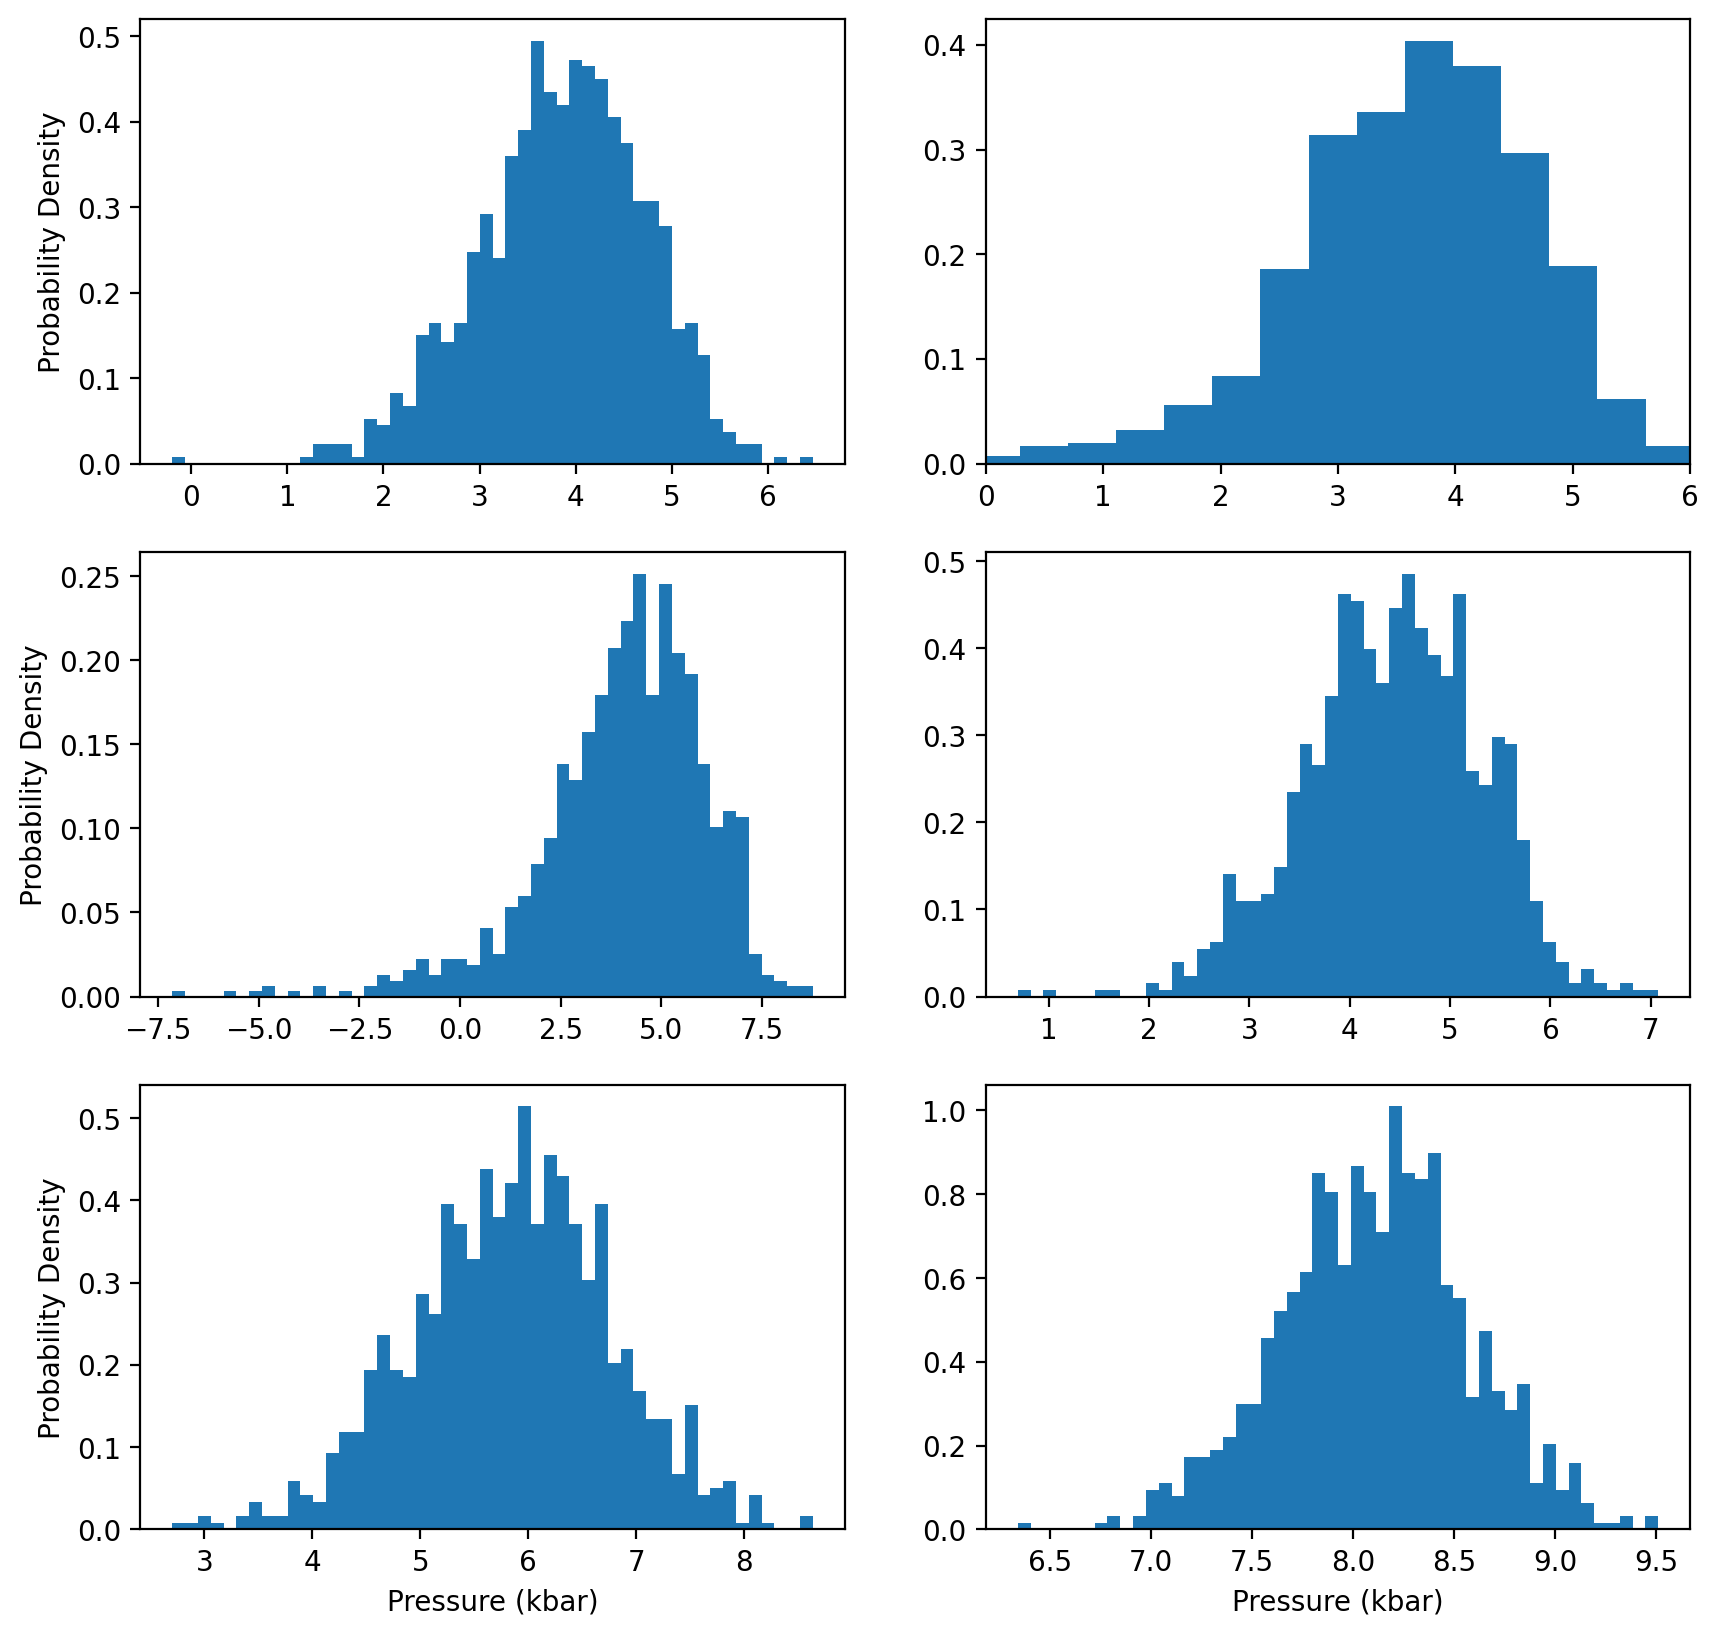

In [20]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

## Similar plot, but showing temperature distributions for first 6 pairs

Text(0, 0.5, 'Probability Density')

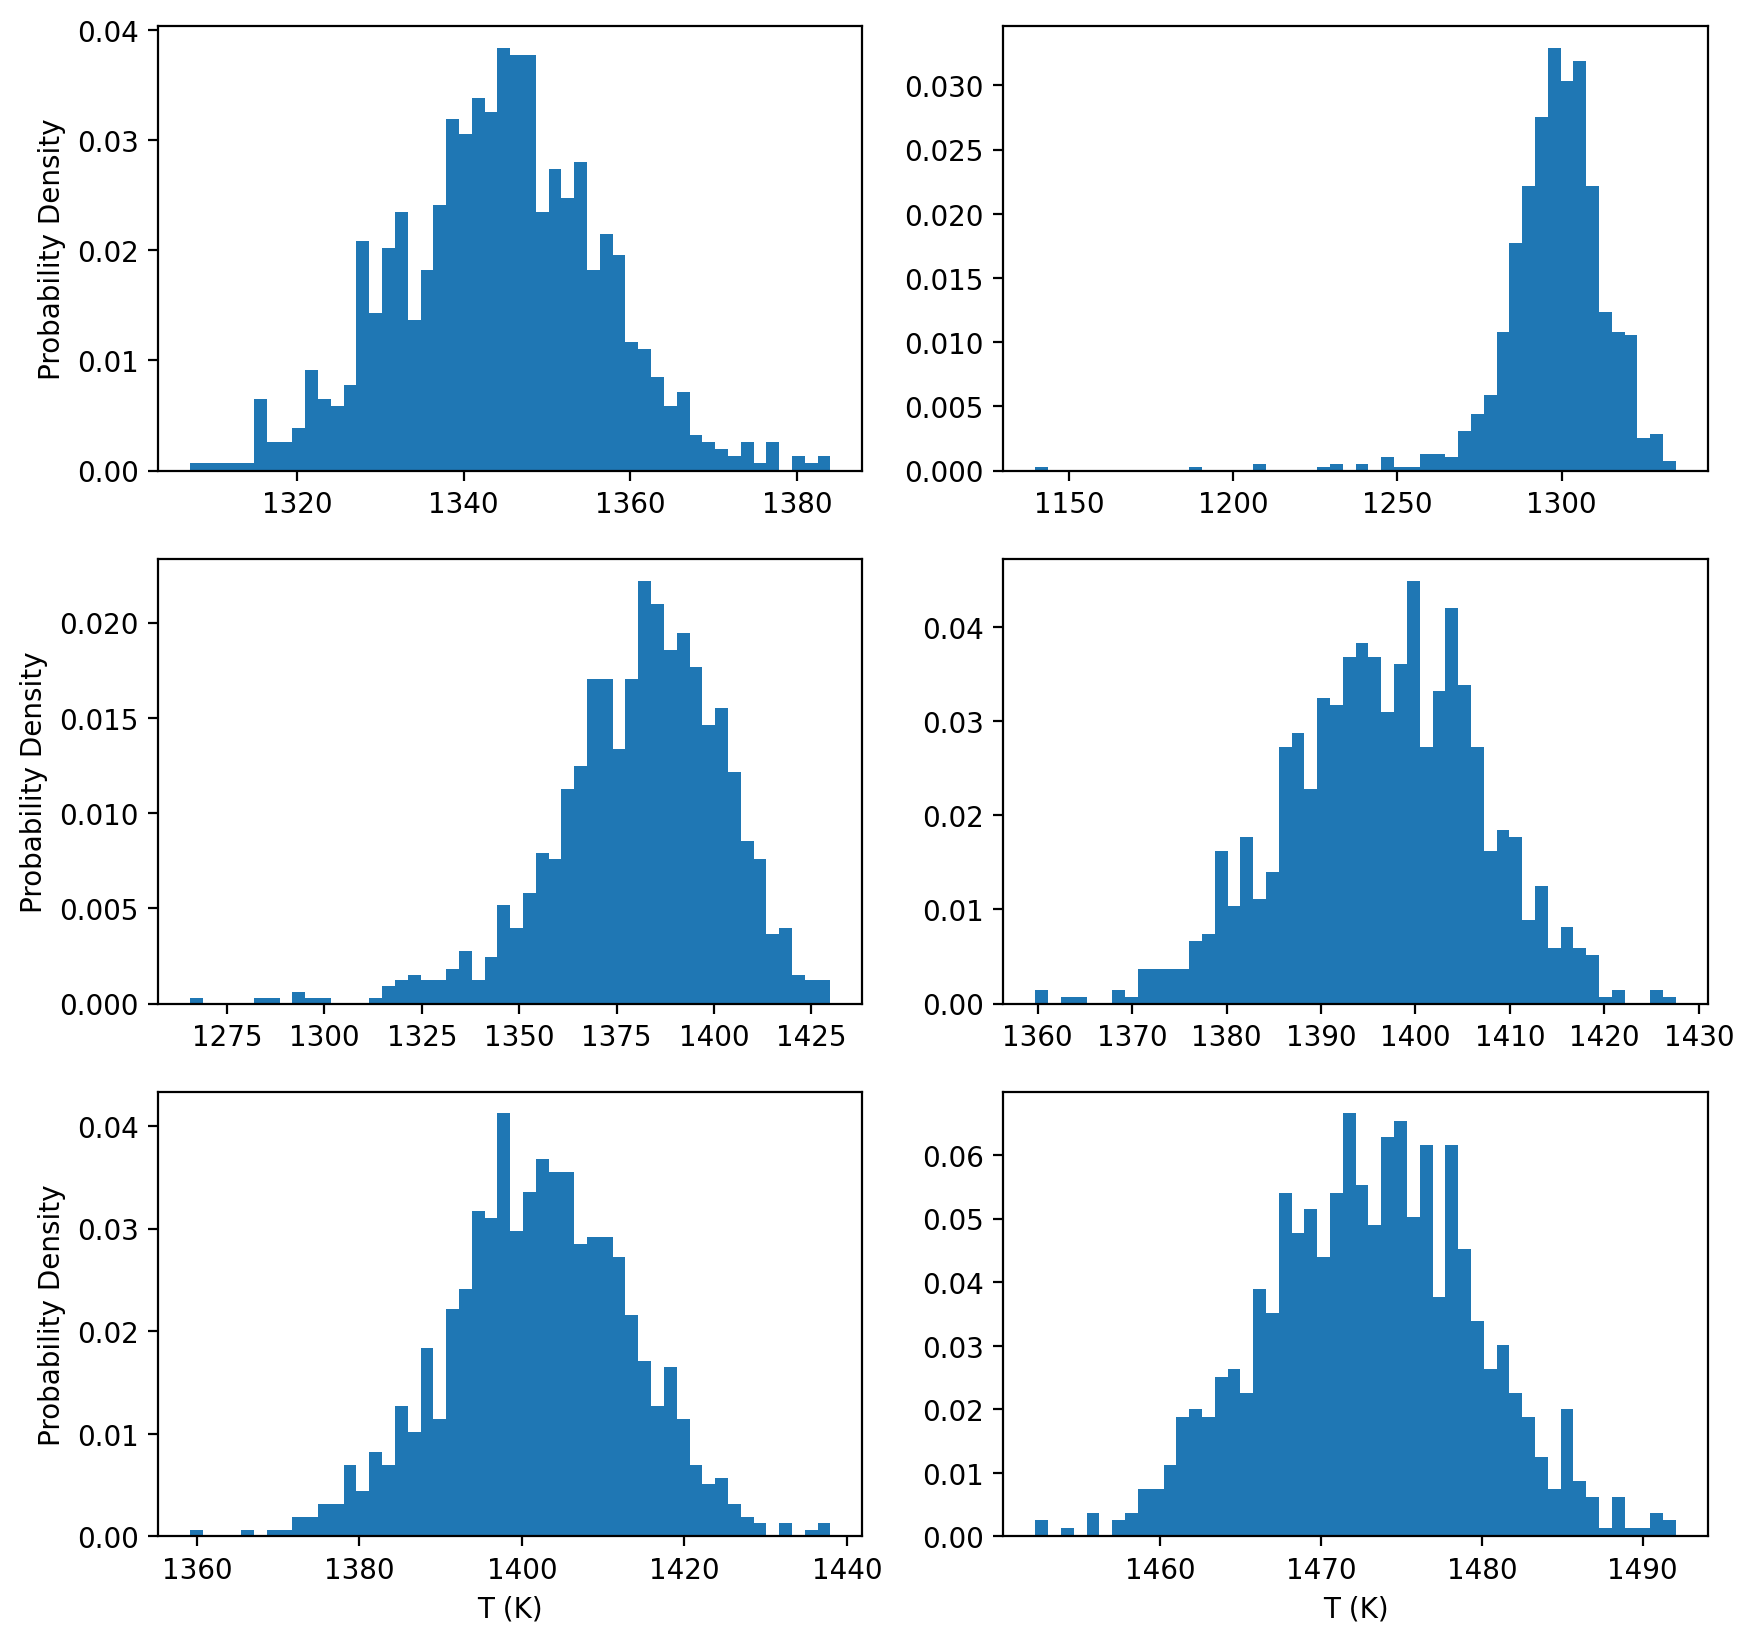

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')